In [1]:
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def resumen_general(grupo):

    fecha_menor = grupo['Fecha'].min()
    fecha_mayor = grupo['Fecha'].max()
    cantidad_registros = len(grupo['kWh'])
    cantidad_registros_cero = np.sum(grupo['kWh']==0)
    kwh_minimo = '{:10.3f}'.format(grupo['kWh'].min())
    kwh_maximo = '{:10.3f}'.format(grupo['kWh'].max())
    kwh_promedio = '{:10.3f}'.format(grupo['kWh'].mean())
    kwh_desviacion = '{:10.3f}'.format(grupo['kWh'].std())
                            
    c = ['Fecha Máxima','Fecha Mínima','Cantidad Registros','Cantidad de registros con Cero',
         'kWh mínimo','kWh Máximo','kWh Promedio','kWh Desviacion']
    
    variables = pd.Series([fecha_menor,fecha_mayor,cantidad_registros,
                           cantidad_registros_cero,kwh_minimo,kwh_maximo,
                           kwh_promedio,kwh_desviacion], 
                     index=c)
    
    return variables

In [3]:
listado_agentes_path = os.path.join('..','..','dataset','xm','Listado_Agentes.xlsx')
listado_agentes = pd.read_excel(listado_agentes_path,skiprows=3)

In [6]:
data_dir_path = os.path.join('..','..','dataset','Series','Demanda','Por Comercializador')

In [7]:
data_list = list()
for file_name in os.listdir(data_dir_path):
    if 'NO REGULADO' in file_name:
        file = pd.read_excel(os.path.join(data_dir_path,file_name))
        data_list.append(file)
        print(os.path.join(data_dir_path,file_name),file.shape)

..\..\dataset\Series\Demanda\Por Comercializador\NO REGULADO_0.xlsx (947082, 5)
..\..\dataset\Series\Demanda\Por Comercializador\NO REGULADO_1.xlsx (947081, 5)
..\..\dataset\Series\Demanda\Por Comercializador\NO REGULADO_2.xlsx (947081, 5)
..\..\dataset\Series\Demanda\Por Comercializador\NO REGULADO_3.xlsx (947081, 5)
..\..\dataset\Series\Demanda\Por Comercializador\NO REGULADO_4.xlsx (947081, 5)
..\..\dataset\Series\Demanda\Por Comercializador\NO REGULADO_5.xlsx (947081, 5)
..\..\dataset\Series\Demanda\Por Comercializador\NO REGULADO_6.xlsx (947081, 5)


In [8]:
full_data = pd.concat(data_list)

In [9]:
'Hay un total de {} registros asociados a la variable Demanda Por Comercializador No Regulado'.format(full_data.shape[0])

'Hay un total de 6629568 registros asociados a la variable Demanda Por Comercializador No Regulado'

In [10]:
full_data.columns

Index(['Fecha', 'Codigo Comercializador', 'Mercado', 'Version', 'kWh'], dtype='object')

In [11]:
comercializador_unico = pd.unique(full_data['Codigo Comercializador'])
'Hay un total de {} comercializadores asociados a la variable Demanda Por Comercializador No Regulado'.format(len(comercializador_unico))

'Hay un total de 96 comercializadores asociados a la variable Demanda Por Comercializador No Regulado'

In [12]:
full_data_resumen = full_data.groupby('Codigo Comercializador').apply(resumen_general)

In [13]:
pd.set_option('display.max_rows', None)
full_data_resumen = full_data_resumen.reset_index()
full_data_resumen

,Codigo Comercializador,Fecha Máxima,Fecha Mínima,Cantidad Registros,Cantidad de registros con Cero,kWh mínimo,kWh Máximo,kWh Promedio,kWh Desviacion
0,AMZC,2017-01-01,2017-12-31 23:00:00,8760,4380,0.000,5566.930,2470.970,2471.609
1,ASCC,2005-03-01,2020-04-03 23:00:00,110976,5175,0.000,1106.140,175.358,179.561
2,CAEC,2000-03-09,2009-08-18 23:00:00,60192,0,42.030,26630.070,8110.493,6337.140
3,CALC,2003-03-15,2012-11-01 23:00:00,84480,42016,0.000,4373.030,329.933,355.107
4,CASC,2008-09-23,2020-04-03 23:00:00,101064,1,0.000,6265.920,1978.985,1328.809
5,CBNC,2020-01-01,2020-04-03 23:00:00,2256,0,117.610,11970.780,8458.723,3327.056
6,CCOC,2005-11-01,2018-12-19 23:00:00,115128,0,103.840,462828.350,150684.503,105370.609
7,CDIC,2002-06-01,2010-08-31 23:00:00,52704,4682,0.000,3007.060,703.119,658.407
8,CDLC,2000-06-01,2002-05-31 23:00:00,17520,1,0.000,131453.890,1036.084,3603.254
9,CDNC,2001-12-17,2020-04-03 23:00:00,160224,55,0.000,99879.180,2166.941,2349.718


In [14]:
full_data_resumen = pd.merge(full_data_resumen,listado_agentes,how='left',
                             left_on='Codigo Comercializador',right_on='Código')

In [15]:
full_data_resumen = full_data_resumen.reindex(columns=['Codigo Comercializador','Descripción Agente','Estado',
                                                       'Fecha Máxima','Fecha Mínima','Cantidad Registros',
                                                       'Cantidad de registros con Cero','kWh mínimo','kWh Máximo',
                                                       'kWh Promedio','kWh Desviacion'])

In [16]:
mask_comercializador_inactivo = full_data_resumen['Estado'] == 'INACTIVO'
comercializador_inactivo = full_data_resumen[mask_comercializador_inactivo]
comercializador_operativo = full_data_resumen[~mask_comercializador_inactivo]

In [17]:
print('Hay un total de {} comercializadores inactivos'.format(comercializador_inactivo.shape[0]))
print('Hay un total de {} comercializadores operativos'.format(comercializador_operativo.shape[0]))

Hay un total de 40 comercializadores inactivos
Hay un total de 56 comercializadores operativos


In [18]:
comercializador_operativo

,Codigo Comercializador,Descripción Agente,Estado,Fecha Máxima,Fecha Mínima,Cantidad Registros,Cantidad de registros con Cero,kWh mínimo,kWh Máximo,kWh Promedio,kWh Desviacion
1,ASCC,A.S.C. INGENIERIA S.A. E.S.P.,OPERACION,2005-03-01,2020-04-03 23:00:00,110976,5175,0.000,1106.140,175.358,179.561
4,CASC,EMPRESA DE ENERGIA DE CASANARE S.A. E.S.P.,OPERACION,2008-09-23,2020-04-03 23:00:00,101064,1,0.000,6265.920,1978.985,1328.809
5,CBNC,COLOMBINA ENERGIA SAS ESP,OPERACION,2020-01-01,2020-04-03 23:00:00,2256,0,117.610,11970.780,8458.723,3327.056
6,CCOC,ENERGIA EMPRESARIAL DE LA COSTA S.A. E.S.P.,OPERACION,2005-11-01,2018-12-19 23:00:00,115128,0,103.840,462828.350,150684.503,105370.609
7,CDIC,CENTRALES ELECTRICAS DEL CAUCA S.A. E.S.P. (I...,OPERACION,2002-06-01,2010-08-31 23:00:00,52704,4682,0.000,3007.060,703.119,658.407
9,CDNC,CENTRALES ELECTRICAS DE NARIÑO S.A. E.S.P.,OPERACION,2001-12-17,2020-04-03 23:00:00,160224,55,0.000,99879.180,2166.941,2349.718
10,CDSC,CODENSA S.A. E.S.P.,OPERACION,2000-01-01,2020-04-03 23:00:00,140328,61358,0.000,159165.680,32389.009,32622.507
12,CEOC,COMPAÑIA ENERGETICA DE OCCIDENTE S.A.S. ESP,OPERACION,2010-09-01,2020-04-03 23:00:00,84072,0,48.940,70288.940,6311.993,3536.228
14,CETC,COMPAÑIA DE ELECTRICIDAD DE TULUA S.A. E.S.P.,OPERACION,2000-01-01,2020-04-03 23:00:00,177576,2,0.000,14784.950,4913.903,1857.653
17,CHCC,CENTRAL HIDROELECTRICA DE CALDAS S.A. E.S.P.,OPERACION,2000-01-01,2016-12-31 23:00:00,149040,8184,0.000,76779.840,14129.779,9559.331


In [19]:
distribucion_quantiles = comercializador_operativo['Cantidad Registros'].quantile([0.05, 0.25, 0.5, 0.9])

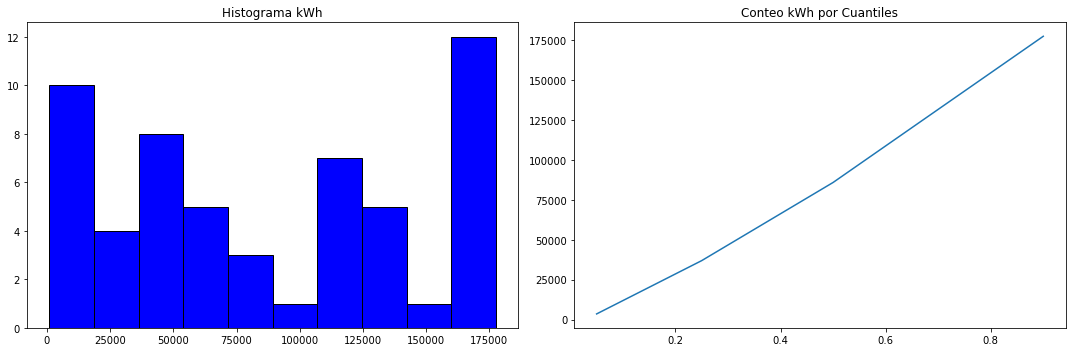

In [20]:
fig, axis = plt.subplots(1,2,figsize=(15,5))
axis[0].set_title('Histograma kWh')
axis[1].set_title('Conteo kWh por Cuantiles')

axis[0].hist(comercializador_operativo['Cantidad Registros'],color = 'blue', edgecolor = 'black')
axis[1].plot(distribucion_quantiles)

plt.tight_layout()
plt.show()